In [15]:
# Notebook to slim the production files for the LPR
import os
import sys
import tables as tb
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import dask.dataframe as dd

import re

In [16]:
# Now load in the stack 
# directory_path = '../data/nexus/LPR_Tl208_Ports/PORT_1a/'
directory_path = '/Users/mistryk2/Packages/nexus/'

# ddf = dd.read_hdf(os.path.join(directory_path, '*.h5'), key = 'MC/particles')
ddf = dd.read_hdf(os.path.join(directory_path, 'ATPC_gamma.h5'), key = 'MC/hits')
hits = ddf.compute()

# Make sure hits are in the gas volume
hits = hits[hits.label == "GAS"]

# ddf = dd.read_hdf(os.path.join(directory_path, '*.h5'), key = 'MC/particles')
ddf = dd.read_hdf(os.path.join(directory_path, 'ATPC_gamma.h5'), key = 'MC/configuration')
config = ddf.compute()

display(config)

display(hits)

,param_key,param_value
0,event_type,other
1,num_events,1000000
2,saved_events,3329
3,interacting_events,134739
4,/PhysicsList/RegisterPhysics,G4EmStandardPhysics_option4
5,/PhysicsList/RegisterPhysics,G4DecayPhysics
6,/PhysicsList/RegisterPhysics,G4RadioactiveDecayPhysics
7,/PhysicsList/RegisterPhysics,NexusPhysics
8,/PhysicsList/RegisterPhysics,G4StepLimiterPhysics
9,/nexus/RegisterGeometry,ATPC


,event_id,x,y,z,time,energy,label,particle_id,hit_id
0,0,1617.971558,479.604279,18.428768,1.035080,0.000023,GAS,1,0
1,0,1617.971436,479.604187,18.428749,1.035109,0.000047,GAS,3,0
2,0,1621.171387,482.807556,19.853474,1.051174,0.002468,GAS,2,0
3,0,1639.962158,490.241577,23.104776,1.120574,0.009524,GAS,2,1
4,0,1657.922729,491.038330,23.103683,1.181543,0.008766,GAS,2,2
...,...,...,...,...,...,...,...,...,...
748488,3328,-2.593958,-1396.612549,-362.341095,2.486652,0.000426,GAS,22,1
748489,3328,-2.599773,-1396.610962,-362.340424,2.486967,0.000251,GAS,22,2
748490,3328,-2.596860,-1396.608521,-362.337982,2.487233,0.000117,GAS,22,3
748491,3328,-2.597816,-1396.607788,-362.334351,2.487478,0.000040,GAS,22,4


In [17]:
# Sum the energy of the hits and bin into a histogram
hit_tot_energy = hits.groupby('event_id')['energy'].sum().reset_index(name='hit_tot_energy')

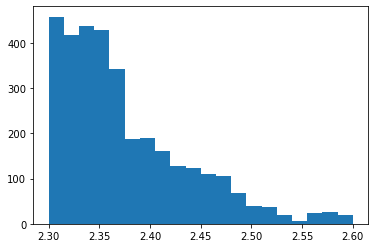

In [18]:
plt.figure()
plt.hist(hit_tot_energy.hit_tot_energy, bins = 20);